In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_train= pd.read_csv('train.csv')
dataset_test= pd.read_csv('test.csv')

In [3]:
print(dataset_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
p= np.array(dataset_train['SibSp'])
print(np.unique(p))

[0 1 2 3 4 5 8]


In [37]:
dataset_train['Age'].fillna(dataset_train['Age'].median(),inplace =True)
dataset_test['Age'].fillna(dataset_test['Age'].median(),inplace =True)

In [6]:
print(dataset_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


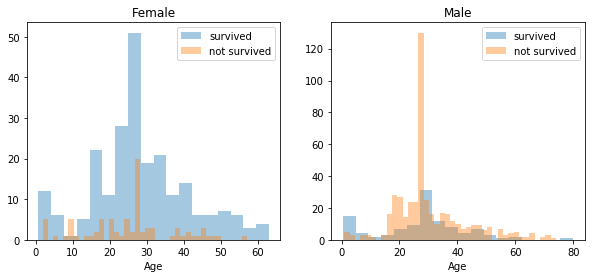

In [8]:
import seaborn as sns
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = dataset_train[dataset_train['Sex']=='female']
men = dataset_train[dataset_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [21]:
data=[dataset_train, dataset_test]
for datains in data:
    datains['Relatives']=datains['SibSp']+datains['Parch']
    datains.loc[datains['Relatives']>0 ,'not_alone']=0
    datains.loc[datains['Relatives']==0, 'not_alone']=1
    datains['not_alone']=datains['not_alone'].astype(int)
dataset_train['not_alone'].value_counts()    
    

1    537
0    354
Name: not_alone, dtype: int64

In [38]:
dataset_train=dataset_train.drop(['PassengerId'],axis=1)
dataset_train=dataset_train.drop(['Cabin'],axis=1)


KeyError: "['PassengerId'] not found in axis"

In [39]:
dataset_test=dataset_test.drop(['PassengerId'],axis=1)
dataset_test=dataset_test.drop(['Cabin'],axis=1)

In [40]:
dataset_train['Embarked'].fillna('S',inplace =True)
dataset_test['Embarked'].fillna('S',inplace =True)

In [27]:
print(dataset_train.isna().sum())

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
Relatives    0
not_alone    0
dtype: int64


In [29]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  Relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [30]:
gender= {"male":0,"female":1}
data =[dataset_train,dataset_test]
for datains in data:
    datains['Sex']= datains['Sex'].map(gender)

In [32]:
def func(s):
    if(s=='S'):
        return 0
    if(s=='C'):
        return 1
    if(s=='Q'):
        return 2

data =[dataset_train, dataset_test]
for datains in data:
    datains['Embarked']=datains['Embarked'].apply(func)

In [46]:
dataset_test['Fare'].fillna(dataset_test['Fare'].median(),inplace =True)

In [34]:
dataset_train= dataset_train.drop(['Ticket'],axis=1)
dataset_test= dataset_test.drop(['Ticket'],axis=1)

In [42]:
data = [dataset_train, dataset_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [47]:
data = [dataset_train, dataset_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [49]:
data = [dataset_train, dataset_test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['Relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [51]:
dataset_train=dataset_train.drop(['Name'],axis=1)
dataset_test=dataset_test.drop(['Name'],axis=1)

In [52]:
dataset_train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Age_Class,Fare_Per_Person
0,0,3,0,0,1,0,0,0,1,0,0,0
1,1,1,1,0,1,0,0,1,1,0,0,0
2,1,3,1,0,0,0,0,0,0,1,0,0
3,1,1,1,0,1,0,0,0,1,0,0,0
4,0,3,0,0,0,0,0,0,0,1,0,0
5,0,3,0,0,0,0,0,2,0,1,0,0
6,0,1,0,0,0,0,0,0,0,1,0,0
7,0,3,0,0,3,1,0,0,4,0,0,0
8,1,3,1,0,0,2,0,0,2,0,0,0
9,1,2,1,0,1,0,0,1,1,0,0,0


In [53]:
dataset_test.head(15)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,not_alone,Age_Class,Fare_Per_Person
0,3,0,5,0,0,0,2,0,1,15,0
1,3,1,6,1,0,0,0,1,0,18,0
2,2,0,6,0,0,0,2,0,1,12,0
3,3,0,3,0,0,0,0,0,1,9,0
4,3,1,2,1,1,0,0,2,0,6,0
5,3,0,1,0,0,0,0,0,1,3,0
6,3,1,4,0,0,0,2,0,1,12,0
7,2,0,3,1,1,0,0,2,0,6,0
8,3,1,1,0,0,0,1,0,1,3,0
9,3,0,2,2,0,0,0,2,0,6,0


In [55]:
X_train=dataset_train.drop('Survived',axis=1)
Y_train= dataset_train['Survived']
X_test= dataset_test.copy()

In [56]:
from sklearn.ensemble import RandomForestClassifier
algo = RandomForestClassifier()
algo.fit(X_train,Y_train)
RandomPredict= algo.predict(X_test)

algo.score(X_train,Y_train)
acc_random_forest = round(algo.score(X_train, Y_train) * 100, 2)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [58]:
algo = LogisticRegression()
algo.fit(X_train,Y_train)
LogPredict= algo.predict(X_test)

algo.score(X_train,Y_train)
acc_logistic_regression = round(algo.score(X_train, Y_train) * 100, 2)

In [59]:
algo = KNeighborsClassifier(n_neighbors=3)
algo.fit(X_train,Y_train)
knnpredict= algo.predict(X_test)

algo.score(X_train,Y_train)
acc_knn = round(algo.score(X_train, Y_train) * 100, 2)

In [61]:
algo = GaussianNB()
algo.fit(X_train,Y_train)
NBpredict= algo.predict(X_test)

algo.score(X_train,Y_train)
acc_nb = round(algo.score(X_train, Y_train) * 100, 2)

In [62]:
algo = LinearSVC()
algo.fit(X_train,Y_train)
SVMPredict= algo.predict(X_test)

algo.score(X_train,Y_train)
acc_svm = round(algo.score(X_train, Y_train) * 100, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
algo = DecisionTreeClassifier()
algo.fit(X_train,Y_train)
DTPredict= algo.predict(X_test)

algo.score(X_train,Y_train)
acc_dt = round(algo.score(X_train, Y_train) * 100, 2)

In [66]:
results= pd.DataFrame({
           'Models': ['Logistic Regression','Random Forest', 'KNN', 'Linear SVC', 'Naive Bayes', 'Decision Tree'],
        'Scores':[acc_logistic_regression,acc_random_forest,acc_knn,acc_svm,acc_nb,acc_dt]
})
result_df = results.sort_values(by='Scores', ascending=False)
result_df = result_df.set_index('Scores')
result_df.head(7)

,Models
Scores,
83.73,Random Forest
83.73,Decision Tree
80.02,Logistic Regression
80.02,Linear SVC
79.69,KNN
78.79,Naive Bayes
